<a href="https://colab.research.google.com/github/sagebanks/Data-Science/blob/main/Banks_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [3]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [4]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [6]:
url = "https://docs.google.com/presentation/d/14o2lMo3xeCDqWztN85Sqyjq_JUYEANLTMZFcDM49uoc/edit#slide=id.p"

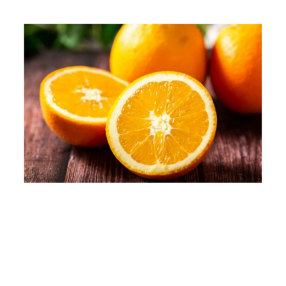

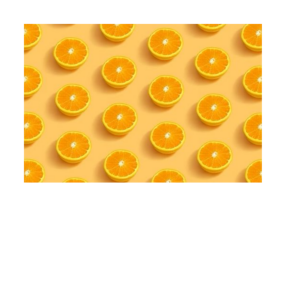

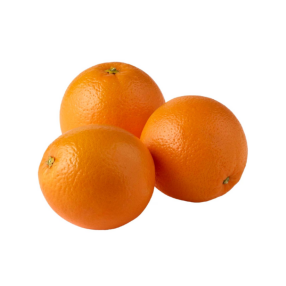

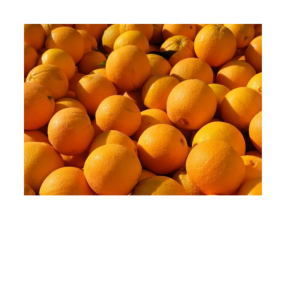

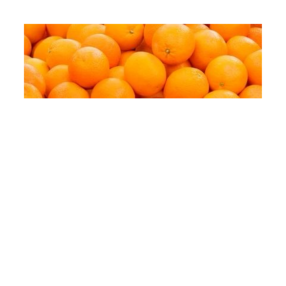

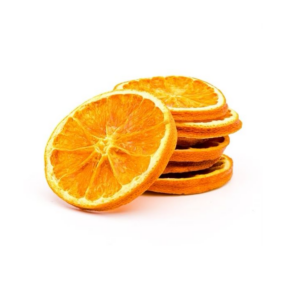

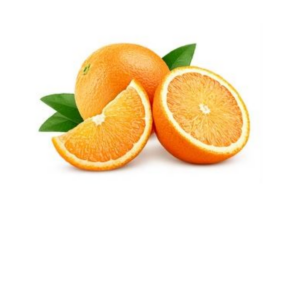

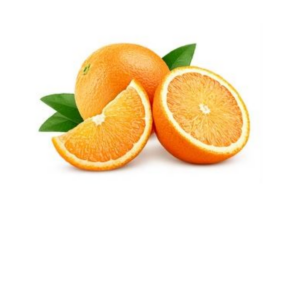

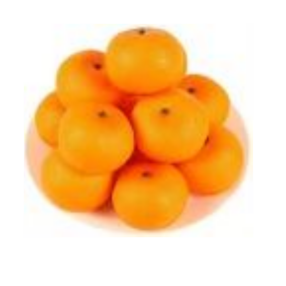

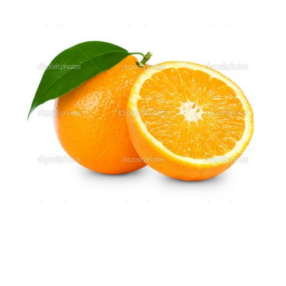

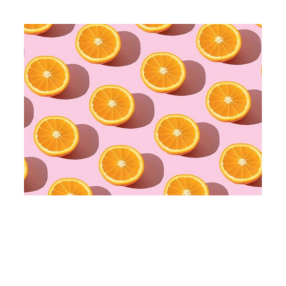

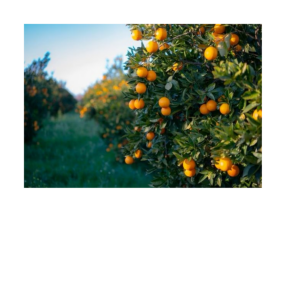

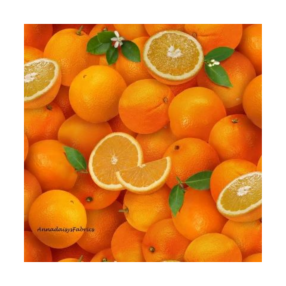

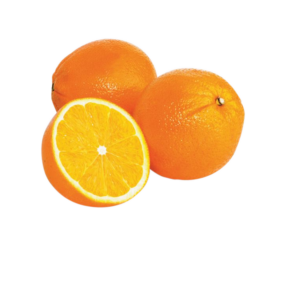

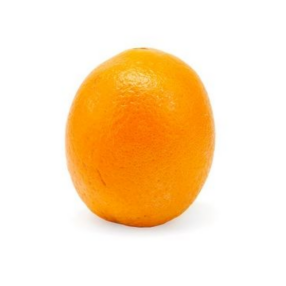

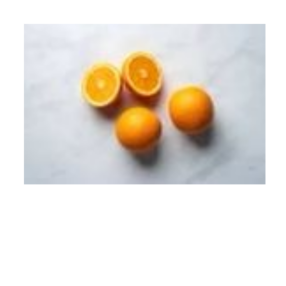

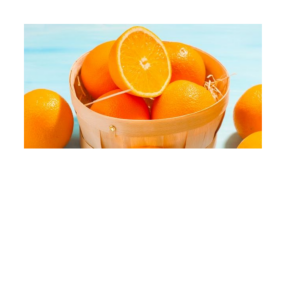

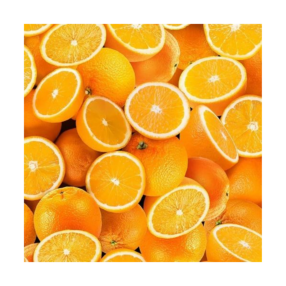

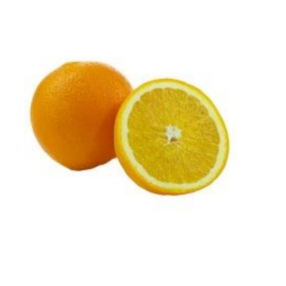

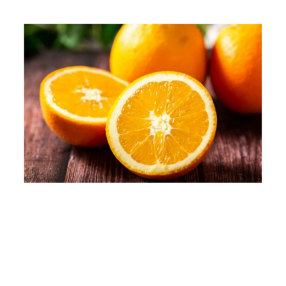

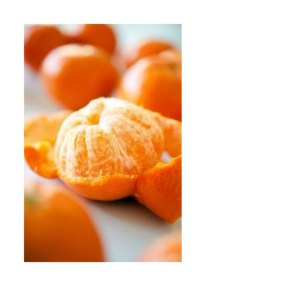

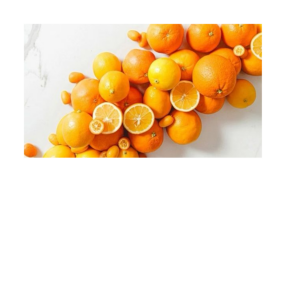

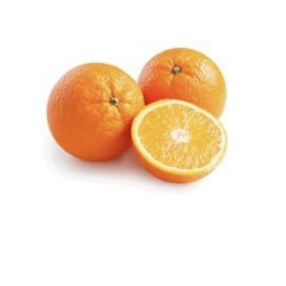

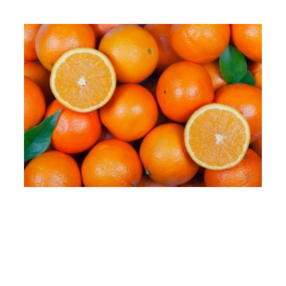

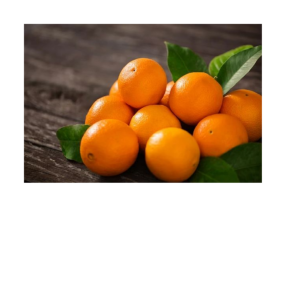

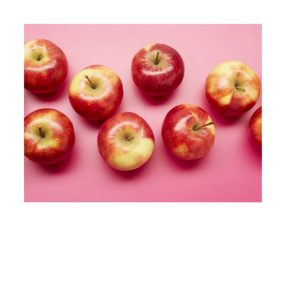

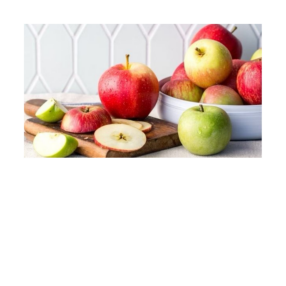

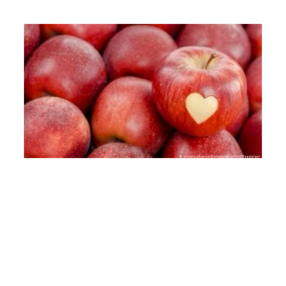

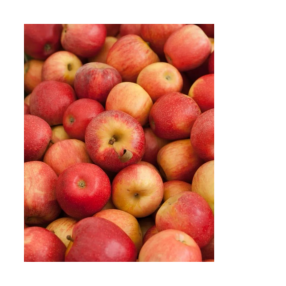

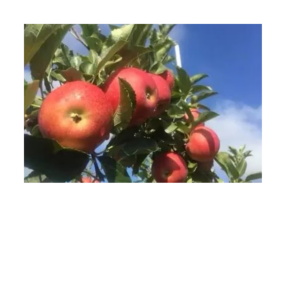

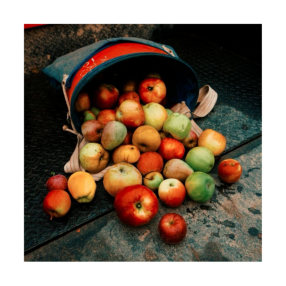

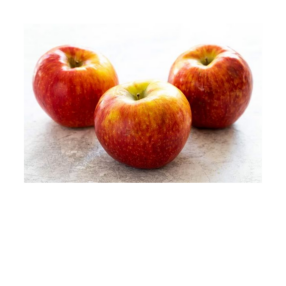

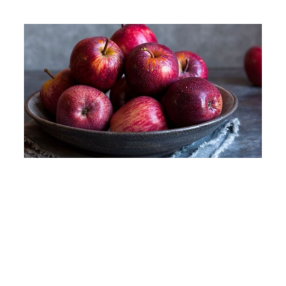

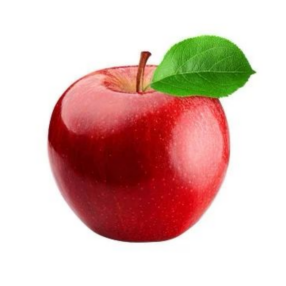

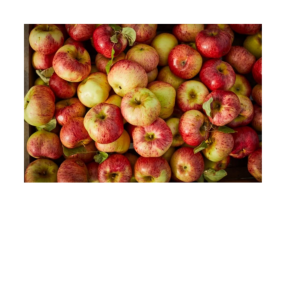

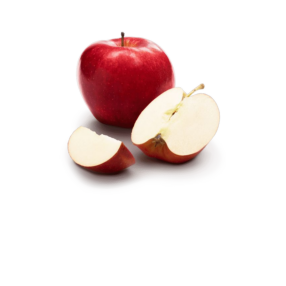

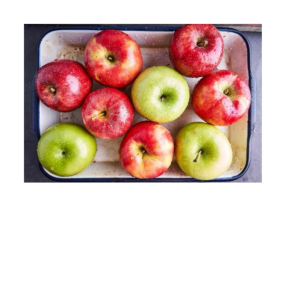

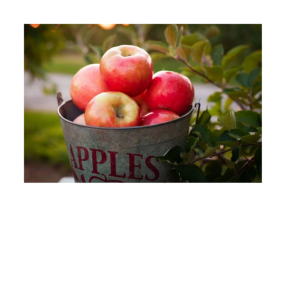

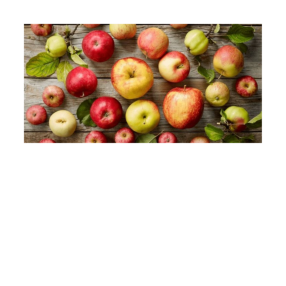

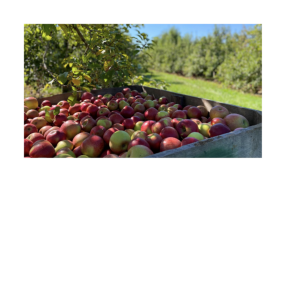

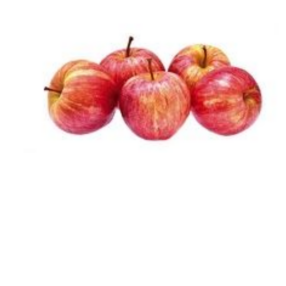

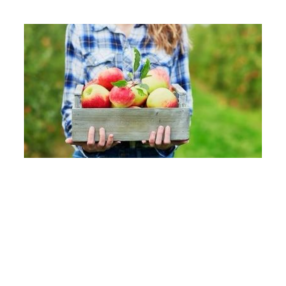

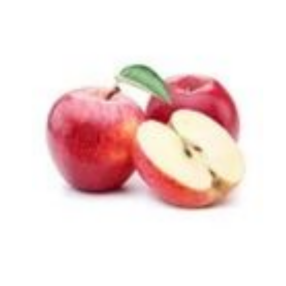

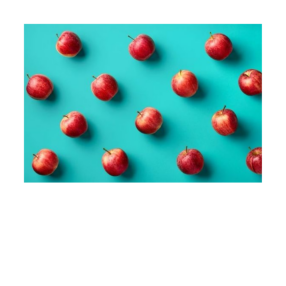

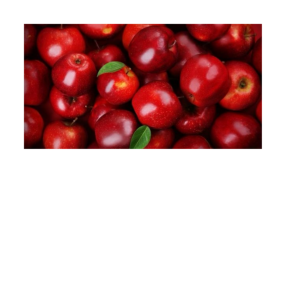

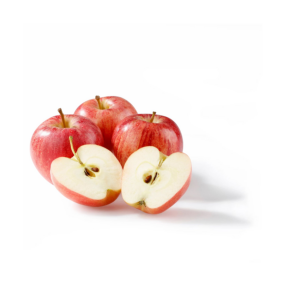

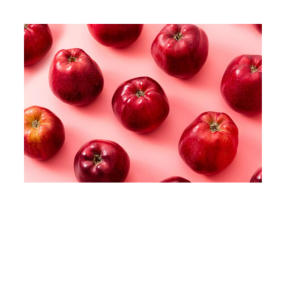

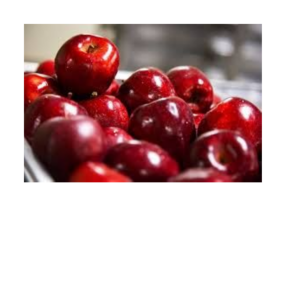

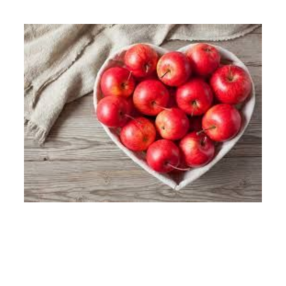

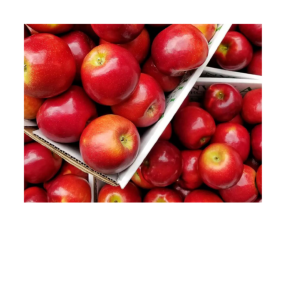

In [7]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [2]:
#25 pictures of oranges and 25 pictures of apples

In [8]:
images.shape

torch.Size([50, 3, 224, 224])

In [12]:
#image shape is the dimensions of a given image like the height and width of the image

In [9]:
model(images)

tensor([[-4.8754, -2.2442, -7.7653,  ...,  2.1868,  6.9359, -0.4766],
        [-1.4724,  1.2571, -4.9529,  ..., -1.5383,  5.4138,  3.9201],
        [-3.0475, -0.6112, -7.2038,  ...,  3.0687,  8.8749, -2.4328],
        ...,
        [-3.3298, -3.0262, -5.8137,  ...,  2.4794,  6.4467,  2.0868],
        [-1.6553, -0.9028, -4.1918,  ..., -0.8977,  4.9773,  3.2112],
        [-0.8414, -1.9110, -2.4932,  ...,  0.9519,  6.2264,  1.8871]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
y = model(images)

In [3]:
#processes the images 

In [11]:
y.shape

torch.Size([50, 1000])

In [11]:
#y.shape attribute for numpy arrays returns the dimensions of the array

In [12]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [13]:
for i in list(guesses):
    print(labels[i])

orange
honeycomb
orange
orange
corn
orange
orange
orange
bell pepper
orange
pill bottle
envelope
pill bottle
orange
orange
ping-pong ball
orange
pill bottle
lemon
orange
pill bottle
corn
orange
orange
lemon
buckeye, horse chestnut, conker
lemon
matchstick
matchstick
monitor
ping-pong ball
strawberry
pomegranate
bell pepper
rubber eraser, rubber, pencil eraser
lipstick, lip rouge
fig
cup
fig
hair slide
hair slide
web site, website, internet site, site
maraca
envelope
strawberry
hair slide
matchstick
pomegranate
pomegranate
abacus


In [1]:
#list of guesses maid about what the pictures from above are

In [14]:
Y = np.zeros(50,)
Y[25:] = 1

In [15]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
#the y value data point that were found

In [16]:
X = y.detach().cpu().numpy() 

In [17]:
X.shape

(50, 1000)

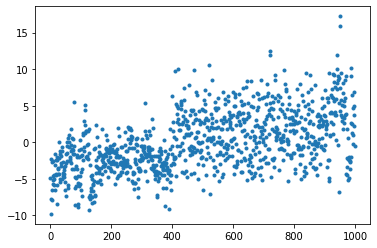

In [18]:
plt.plot(X[0],'.')

In [4]:
#plot point for the x and y defined above

In [19]:
X[0]

array([-4.87537146e+00, -2.24424887e+00, -7.76533508e+00, -9.80866241e+00,
       -7.91564655e+00, -2.77107000e+00, -6.52261066e+00, -4.58062267e+00,
       -2.57078671e+00, -5.66902208e+00, -5.10436630e+00, -5.87553930e+00,
       -5.00510740e+00, -4.42440319e+00, -6.49154758e+00, -3.17569232e+00,
       -1.63339257e+00, -2.47887421e+00, -4.51457977e+00, -4.36190033e+00,
       -5.88896561e+00, -8.45817947e+00, -2.03454685e+00, -2.40922213e+00,
       -3.52401018e+00, -3.61776972e+00, -4.40649939e+00,  9.43742692e-02,
       -2.17883062e+00, -4.28081942e+00, -5.50728703e+00, -1.13102329e+00,
       -1.57497358e+00, -5.02173901e+00, -3.21297050e+00, -2.77149701e+00,
       -1.84255612e+00, -6.91985130e-01, -1.22642112e+00, -4.99047661e+00,
       -2.63944507e+00, -4.68746662e+00, -4.18266439e+00, -4.29554701e+00,
       -3.79241586e+00, -4.78713989e+00, -3.36298800e+00, -3.28351426e+00,
       -6.50394297e+00, -5.46765423e+00, -7.39781904e+00, -2.81901884e+00,
       -1.62091196e+00, -

In [20]:
np.argmax(X[0])

950

In [8]:
#this function returns indices of the max element of the array in a particular axis

In [21]:
labels[948]

'Granny Smith'

In [5]:
#labels creates a name for the data

In [22]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [23]:
for i in top_ten:
    print(labels[i])

orange
lemon
pill bottle
ping-pong ball
butternut squash
croquet ball
corn
spaghetti squash
Band Aid
rubber eraser, rubber, pencil eraser


In [24]:
#these are the top 10 most common labels that were produced 

In [25]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [6]:
#all of the possible guesses of the pictures the data could make

(array([ 23., 100., 262., 245., 182., 121.,  47.,  15.,   3.,   2.]),
 array([-9.808662 , -7.1031847, -4.3977075, -1.6922299,  1.0132477,
         3.7187252,  6.424203 ,  9.129681 , 11.835157 , 14.540635 ,
        17.246113 ], dtype=float32),
 <a list of 10 Patch objects>)

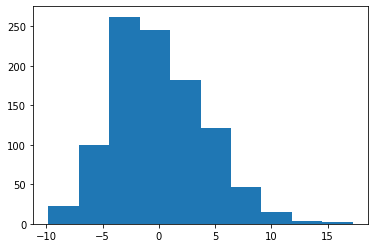

In [26]:
plt.hist(X[0])

In [7]:
#bar graph of the data from above

In [27]:
X = GPU_data(X)
Y = GPU_data(Y)

In [28]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [29]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [30]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [31]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [32]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [33]:
X.shape

torch.Size([50, 1000])

In [9]:
#this is a 2D array 

In [34]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [35]:
def model(x,w):

    return x@w[0]

In [36]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [37]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-4-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [38]:
import wandb

wandb.init(project="test-project", entity="sage-banks")